<a href="https://colab.research.google.com/github/Teraces12/Google-Data-Analytic-Certificate-How-a-Bike-Share-Navigates-Speedy-Success-/blob/main/Hyperparameter_Tuning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unlocking the Power of Hyperparameter Tuning in IPython Notebook
        
---

**Lebede Ngartera**

**Data Scientist | Data Analyst | ML & AI | Ph.D in Maths [Analysis, Statistics & Applications]**

Talks about #data, #analytics, #MachineLearning, #digitaltransformation, and #datadrivendecisionmaking

---

In this notebook, we will explore the concept of hyperparameter tuning and how it can significantly enhance the performance of machine learning models. Hyperparameter tuning is a critical step in the machine learning pipeline, where we fine-tune the settings of a model to achieve the best possible performance. This process involves adjusting parameters that are not learned from the data but are set before the learning process begins.

## What are Hyperparameters?

Hyperparameters are the external configuration settings used to control the learning process of a model. Unlike model parameters, which are derived from the data during training, hyperparameters are set by the practitioner and remain constant during the training process. Examples of hyperparameters include the learning rate, the number of trees in a random forest, the depth of each tree, the number of hidden layers in a neural network, and the regularization strength.

## Importance of Hyperparameter Tuning

The choice of hyperparameters can have a significant impact on the model's performance. Poorly chosen hyperparameters can lead to models that underfit or overfit the data, resulting in poor generalization to new, unseen data. Hyperparameter tuning aims to find the optimal set of hyperparameters that maximize the model's performance on a validation set, ensuring that the model generalizes well to new data.

## Methods of Hyperparameter Tuning

There are several methods for hyperparameter tuning, including:
- **Grid Search:** This method involves specifying a grid of hyperparameters and evaluating the model performance for each combination in the grid. While exhaustive, it can be computationally expensive for large grids.
- **Random Search:** Instead of evaluating all possible combinations, random search selects random combinations of hyperparameters to evaluate. This method can be more efficient than grid search and can find good hyperparameters with fewer evaluations.
- **Bayesian Optimization:** This method uses probabilistic models to identify the most promising hyperparameters based on previous evaluations. It aims to balance exploration and exploitation to find the best hyperparameters efficiently.

## Our Project

In this project, we will use the Iris dataset, a classic dataset in the field of machine learning. The Iris dataset contains measurements of iris flowers from three different species. Our goal is to build a classifier to predict the species of an iris flower based on its measurements. We will start by training a baseline model without hyperparameter tuning and then use Grid Search to find the optimal hyperparameters for our model. Finally, we will visualize the impact of different hyperparameter settings...

Let's dive into the project and see how hyperparameter tuning can improve our model's performance.

## 1. Import Necessary Libraries

We will use popular libraries like `scikit-learn`, `matplotlib`, and `seaborn` for our analysis.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## 2. Load and Explore the Dataset

We will use the Iris dataset for this demonstration.

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the first five rows of the dataset
pd.DataFrame(X, columns=iris.feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## 3. Train a Baseline Model

We will start by training a simple RandomForestClassifier without hyperparameter tuning.

In [3]:
# Train a RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
baseline_accuracy = rf.score(X_test, y_test)
print(f'Baseline Accuracy: {baseline_accuracy:.2f}')

Baseline Accuracy: 1.00


## 4. Perform Hyperparameter Tuning

We will use GridSearchCV to find the best hyperparameters for our RandomForestClassifier.

In [4]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Display the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Evaluate the best model
best_model = grid_search.best_estimator_
tuned_accuracy = best_model.score(X_test, y_test)
print(f'Tuned Accuracy: {tuned_accuracy:.2f}')

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
Tuned Accuracy: 1.00


## 5. Visualize Hyperparameter Surfaces

Let's visualize how the different hyperparameters affect the model performance.

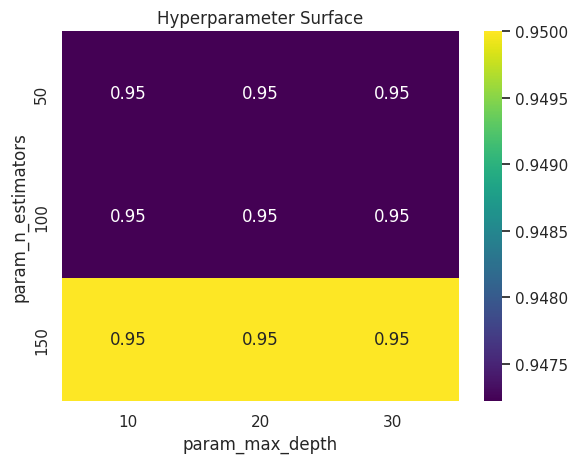

In [5]:
# Extract the results from the grid search
results = pd.DataFrame(grid_search.cv_results_)

# Plot the results
pivot_table = results.pivot_table(values='mean_test_score', index='param_n_estimators', columns='param_max_depth')
sns.heatmap(pivot_table, annot=True, cmap='viridis')
plt.title('Hyperparameter Surface')
plt.show()

### Additional Visualization: 3D Plot of Hyperparameters

We'll use a 3D plot to better understand the relationship between hyperparameters and model performance.

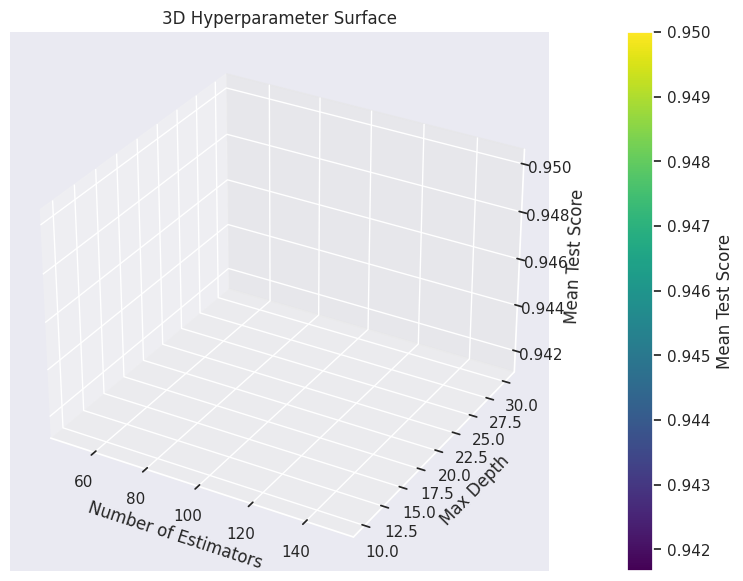

In [8]:
from mpl_toolkits.mplot3d import Axes3D

# Prepare data for 3D plot
n_estimators = results['param_n_estimators'].values
max_depth = results['param_max_depth'].values
mean_test_score = results['mean_test_score'].values

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(n_estimators, max_depth, mean_test_score, c=mean_test_score, cmap='viridis')

# Add titles and labels
ax.set_title('3D Hyperparameter Surface')
ax.set_xlabel('Number of Estimators')
ax.set_ylabel('Max Depth')
ax.set_zlabel('Mean Test Score')

# Add color bar
color_bar = fig.colorbar(scatter, ax=ax, pad=0.1)
color_bar.set_label('Mean Test Score')

plt.show()


## Conclusion

In this notebook, we demonstrated the process of hyperparameter tuning using GridSearchCV and visualized the impact of different hyperparameters on model performance through both a heatmap and a 3D scatter plot.

Hyperparameter tuning is a powerful technique to improve the performance of machine learning models. By systematically searching for the optimal hyperparameter values, we can significantly enhance model accuracy and generalization capabilities. Through this project, we observed how different hyperparameter settings affected the performance of a RandomForestClassifier on the Iris dataset.

By mastering hyperparameter tuning and effectively presenting your results using tools like IPython Notebook, you can showcase your data science expertise to potential recruiters. This not only demonstrates your technical skills but also your ability to communicate complex concepts clearly and effectively, thereby enhancing your chances of getting hired in the competitive field of data science.

---

By following these steps and visualizing the results, you can better understand the importance of hyperparameter tuning and its impact on model performance. This notebook serves as a practical guide to apply these techniques in your own projects.